In [100]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap

In [3]:
df1 = pd.read_csv('/home/subin/다운로드/팩터 논문/¿ÀÇÇ½ºÅÚ ¹× »ó¾÷¿ë°Ç¹° ±âÁØ½Ã°¡_1.csv', encoding='cp949')
df2 = pd.read_csv('/home/subin/다운로드/팩터 논문/¿ÀÇÇ½ºÅÚ ¹× »ó¾÷¿ë°Ç¹° ±âÁØ½Ã°¡_2.csv', encoding='cp949')
df3 = pd.read_csv('/home/subin/다운로드/팩터 논문/¿ÀÇÇ½ºÅÚ ¹× »ó¾÷¿ë°Ç¹° ±âÁØ½Ã°¡_3.csv', encoding='cp949')
df = pd.concat([df1,df2,df3])
df.rename(columns={'법정동코드':'시군구법정동코드'}, inplace=True)
df['전체면적'] = df['전용면적']+df['공유면적']
df['전용률(%)'] = df['전용면적'] / df['전체면적'] * 100
df['전용률(%)'] = df['전용률(%)'].round(0)
df

# 여기서 고시가격은 제곱미터당 고시가격임

<ipython-input-3-24a26caf224c>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/home/subin/다운로드/팩터 논문/¿ÀÇÇ½ºÅÚ ¹× »ó¾÷¿ë°Ç¹° ±âÁØ½Ã°¡_2.csv', encoding='cp949')


,상가건물번호,상가종류코드,고시일자,시군구법정동코드,특수지코드,번지,호,상가건물블록주소,상가건물동주소,건물층구분코드,상가건물층주소,상가건물호주소,고시가격,전용면적,공유면적,전체면적,전용률(%)
0,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,1,5986000,639.47,357.740,997.210,64.0
1,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,2,6640000,198.41,111.000,309.410,64.0
2,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,3,6108000,281.50,157.480,438.980,64.0
3,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,1,2602000,235.35,106.010,341.360,69.0
4,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,10,2602000,231.33,104.200,335.530,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64915,77771,오피스텔,2023-01-01,5013032021,일반지번,507,1,썬비치빌에이동,A동,지상층,7,701,1932000,83.72,20.406,104.126,80.0
64916,77771,오피스텔,2023-01-01,5013032021,일반지번,507,1,썬비치빌에이동,A동,지상층,7,702,1932000,83.72,20.406,104.126,80.0
64917,78192,오피스텔,2023-01-01,5013032021,일반지번,954,3,하르빌표선비동,비동,지상층,2,201,1564000,83.58,21.040,104.620,80.0
64918,78192,오피스텔,2023-01-01,5013032021,일반지번,954,3,하르빌표선비동,비동,지상층,3,301,1596000,83.58,21.040,104.620,80.0


In [4]:
code_korea = pd.read_csv('/home/subin/다운로드/팩터 논문/Z_LURIS_LSCT_LAWDCD.csv', encoding='cp949')
code_korea.rename(columns={'LAWD_CD':'시군구법정동코드'}, inplace=True)
code_korea = code_korea[['시군구법정동코드', 'SIDO_NM', 'SGG_NM', 'UMD_NM']].drop_duplicates()
code_korea

,시군구법정동코드,SIDO_NM,SGG_NM,UMD_NM
0,4790043030,경상북도,예천군,은풍면
1,4275038000,강원도,영월군,무릉도원면
2,4812313400,경상남도,창원시 성산구,용지동
3,4122012800,경기도,평택시,고덕동
4,2671025927,부산광역시,기장군,일광읍
...,...,...,...,...
24027,4480025628,충청남도,홍성군,홍북읍
24028,4136037022,경기도,남양주시,퇴계원면
24029,4679041529,전라남도,화순군,사평면
24030,4729025626,경상북도,경산시,압량읍


In [5]:
commerce = pd.merge(df, code_korea, on='시군구법정동코드', how='left')
commerce

,상가건물번호,상가종류코드,고시일자,시군구법정동코드,특수지코드,번지,호,상가건물블록주소,상가건물동주소,건물층구분코드,상가건물층주소,상가건물호주소,고시가격,전용면적,공유면적,전체면적,전용률(%),SIDO_NM,SGG_NM,UMD_NM
0,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,1,5986000,639.47,357.740,997.210,64.0,서울특별시,종로구,적선동
1,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,2,6640000,198.41,111.000,309.410,64.0,서울특별시,종로구,적선동
2,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,3,6108000,281.50,157.480,438.980,64.0,서울특별시,종로구,적선동
3,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,1,2602000,235.35,106.010,341.360,69.0,서울특별시,종로구,적선동
4,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,10,2602000,231.33,104.200,335.530,69.0,서울특별시,종로구,적선동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162063,77771,오피스텔,2023-01-01,5013032021,일반지번,507,1,썬비치빌에이동,A동,지상층,7,701,1932000,83.72,20.406,104.126,80.0,제주특별자치도,서귀포시,표선면
2162064,77771,오피스텔,2023-01-01,5013032021,일반지번,507,1,썬비치빌에이동,A동,지상층,7,702,1932000,83.72,20.406,104.126,80.0,제주특별자치도,서귀포시,표선면
2162065,78192,오피스텔,2023-01-01,5013032021,일반지번,954,3,하르빌표선비동,비동,지상층,2,201,1564000,83.58,21.040,104.620,80.0,제주특별자치도,서귀포시,표선면
2162066,78192,오피스텔,2023-01-01,5013032021,일반지번,954,3,하르빌표선비동,비동,지상층,3,301,1596000,83.58,21.040,104.620,80.0,제주특별자치도,서귀포시,표선면


In [15]:
commerce.isnull().sum()

상가건물번호       0
상가종류코드       0
고시일자         0
시군구법정동코드     0
특수지코드        0
번지           0
호            0
상가건물블록주소     0
상가건물동주소      0
건물층구분코드      0
상가건물층주소      0
상가건물호주소     11
고시가격         0
전용면적         0
공유면적         0
전체면적         0
전용률(%)       0
SIDO_NM      0
SGG_NM       0
UMD_NM       0
dtype: int64

In [24]:
# 가장 많이/적게 나타난 읍면동 value_counts 확인

pd.set_option('display.max_rows', None)
least_appeared_counts = commerce['UMD_NM'].value_counts().head(100)

print(least_appeared_counts)

구로동      34791
중동       34348
송도동      30385
마곡동      29626
문정동      28506
가산동      28403
부평동      25302
고잔동      24577
서초동      24116
장항동      23632
망월동      23476
청라동      19281
역삼동      18502
우동       16674
관양동      14725
정자동      14622
논현동      14440
영천동      14284
정왕동      14004
이의동      13400
배곧동      13282
상동       13154
백석동      13114
운서동      13095
구래동      13009
봉천동      12900
주안동      12381
다산동      12222
구월동      11501
여의도동     11480
신당동      11399
중산동      10962
안양동      10857
부전동      10782
등촌동      10681
화곡동      10624
대화동      10247
호계동      10213
오산동      10119
신정동       9735
금곡동       9710
인계동       9663
명지동       9632
좌동        9301
연산동       9299
목동        8986
성남동       8978
둔산동       8776
도화동       8749
반송동       8686
독산동       8494
온천동       8485
시흥동       8467
불당동       8369
간석동       8211
풍산동       8117
신천동       8060
상대원동      7852
화정동       7705
천호동       7667
수내동       7661
구의동       7236
일직동       7203
광안동       7143
서현동       7085
성수동2가     7045
방이동       

In [26]:
# 가장 많이/적게 나타난 시도 value_counts 확인

pd.set_option('display.max_rows', None)
least_appeared_counts = commerce['SIDO_NM'].value_counts().head(100)

print(least_appeared_counts)

경기도        764040
서울특별시      653102
인천광역시      223925
부산광역시      202914
대구광역시       53101
대전광역시       43920
광주광역시       39408
경상남도        38043
충청남도        27314
울산광역시       24909
세종특별자치시     20039
전라남도        17651
제주특별자치도     14070
경상북도        12501
충청북도        10577
강원도          9189
전라북도         7365
Name: SIDO_NM, dtype: int64


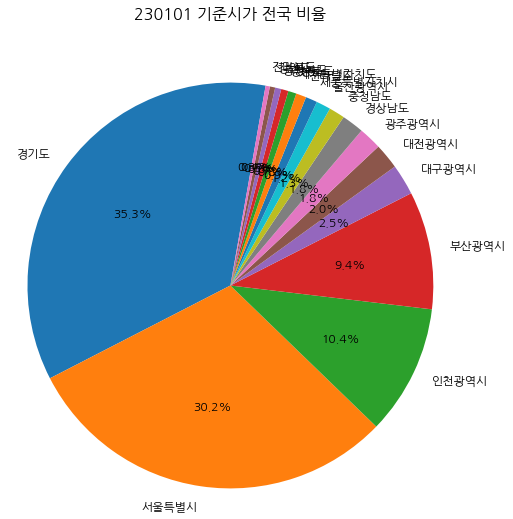

In [31]:
value_counts = commerce['SIDO_NM'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)
plt.rc('font', family='NanumGothic')
plt.title('230101 기준시가 전국 비율', fontsize=16, y=1.1)
plt.rc('font', size=12)
plt.axis('equal')

plt.show()

# 데이터 수 최소인 전라북도는 경기도의 1% 미만 수준

In [33]:
pd.set_option('display.max_rows', 10)

In [6]:
bySido = commerce.groupby(['SIDO_NM']).mean().reset_index()

bySidoName = commerce.groupby(['SIDO_NM', '상가건물블록주소']).mean().reset_index()
bySidoName = bySidoName.groupby(['SIDO_NM']).mean().reset_index()

bySidoNameFloor = commerce.groupby(['SIDO_NM', '상가건물블록주소', '상가건물동주소', '건물층구분코드', '상가건물층주소']).mean().reset_index()
bySidoNameFloor = bySidoNameFloor.groupby(['SIDO_NM', '상가건물블록주소', '상가건물동주소']).mean().reset_index()
bySidoNameFloor = bySidoNameFloor.groupby(['SIDO_NM', '상가건물블록주소']).mean().reset_index()
bySidoNameFloor = bySidoNameFloor.groupby(['SIDO_NM']).mean().reset_index()

<ipython-input-6-921b3d7a83a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bySido = commerce.groupby(['SIDO_NM']).mean().reset_index()
<ipython-input-6-921b3d7a83a0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bySidoName = commerce.groupby(['SIDO_NM', '상가건물블록주소']).mean().reset_index()
<ipython-input-6-921b3d7a83a0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bySidoName = bySidoName.groupby(['SIDO_NM']).

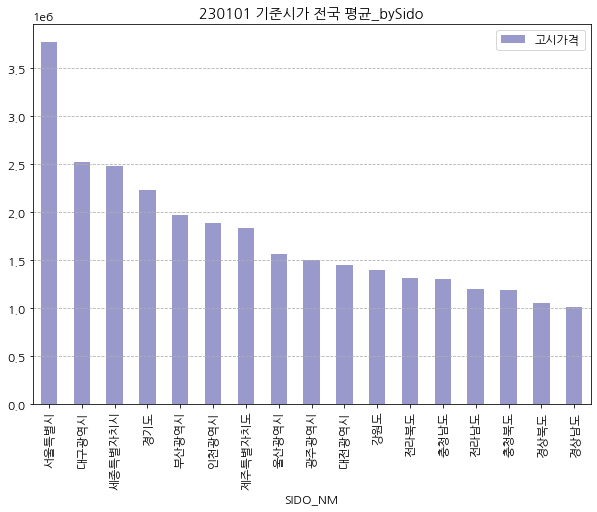

In [39]:
map_avg_gu = bySido.sort_values('고시가격', ascending=False).reset_index()
map_avg_gu.plot(kind="bar", x='SIDO_NM', y='고시가격', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('230101 기준시가 전국 평균_bySido')
plt.grid(True, axis='y', linestyle='--')
plt.legend()

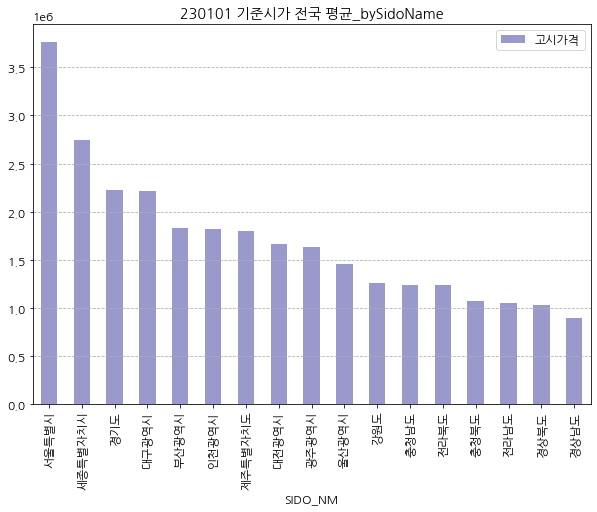

In [40]:
map_avg_gu = bySidoName.sort_values('고시가격', ascending=False).reset_index()
map_avg_gu.plot(kind="bar", x='SIDO_NM', y='고시가격', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('230101 기준시가 전국 평균_bySidoName')
plt.grid(True, axis='y', linestyle='--')
plt.legend()

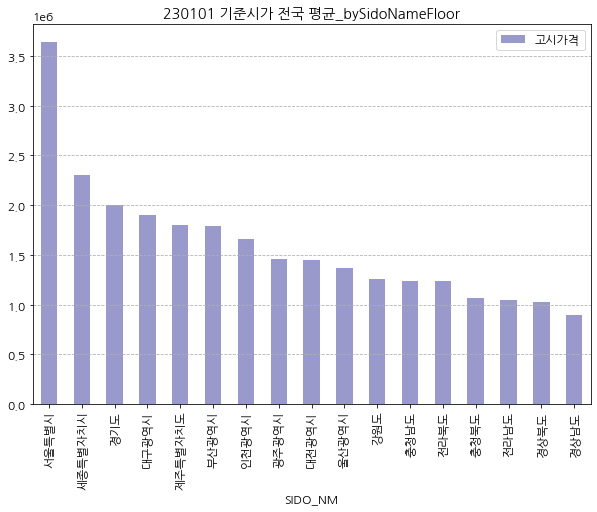

In [41]:
map_avg_gu = bySidoNameFloor.sort_values('고시가격', ascending=False).reset_index()
map_avg_gu.plot(kind="bar", x='SIDO_NM', y='고시가격', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"),sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('230101 기준시가 전국 평균_bySidoNameFloor')
plt.grid(True, axis='y', linestyle='--')
plt.legend()

In [7]:
df4 = pd.read_excel('/home/subin/다운로드/행정_법정동 중심좌표.xlsx')
df4 = df4[df4['코드종류']=='B']
df4.drop(['코드', '코드종류'], axis=1, inplace=True)
df4['리'] = df4['하위']
df4.drop(['하위', '리'], axis=1, inplace=True)
df4

,시도,시군구,읍면동,위도,경도
3546,서울특별시,종로구,청운동,37.587111,126.969069
3547,서울특별시,종로구,신교동,37.583911,126.968354
3548,서울특별시,종로구,궁정동,37.584381,126.971489
3549,서울특별시,종로구,효자동,37.582416,126.971670
3550,서울특별시,종로구,창성동,37.580363,126.972065
...,...,...,...,...,...
22214,제주특별자치도,서귀포시,표선면,33.348068,126.832421
22215,제주특별자치도,서귀포시,표선면,33.393144,126.794822
22216,제주특별자치도,서귀포시,표선면,33.354784,126.771072
22217,제주특별자치도,서귀포시,표선면,33.321147,126.798867


In [8]:
areaCode = df4.groupby(['시도', '시군구', '읍면동']).mean().reset_index()
areaCode.rename(columns={'시도':'SIDO_NM', '시군구':'SGG_NM', '읍면동':'UMD_NM'}, inplace=True)

new_row = pd.DataFrame({
        'UMD_NM': ['반곡동', '소담동', '보람동', '대평동', '한솔동', '나성동', '새롬동', '다정동',
                '어진동', '종촌동', '고운동', '아름동', '도담동', '해밀동', '집현동', '조치원읍',
                '부강면', '장군면'],
        
        '위도' : [36.497520, 36.485595, 36.477891, 35.839927, 36.476649, 36.487127, 36.485168, 36.494960,
                36.501798, 36.503689, 36.512275, 36.514764, 36.513880, 36.526487, 36.493948, 36.595020,
                36.529360, 36.500916],
        
        '경도' : [127.311589, 127.301735, 127.290041, 128.732344, 127.254852, 127.263621, 127.248960, 127.246741,
                127.263573, 127.247646, 127.235812, 127.248289, 127.260553, 127.268708, 127.326279, 127.290701,
                127.370153, 127.214693]})

new_row['SIDO_NM'] = '세종특별자치시'
new_row['SGG_NM'] = '세종시'

areaCode = areaCode.append(new_row)
areaCode

<ipython-input-8-596319fd41a4>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  areaCode = areaCode.append(new_row)


,SIDO_NM,SGG_NM,UMD_NM,위도,경도
0,강원도,강릉시,강동면,37.704703,128.984120
1,강원도,강릉시,강문동,37.795176,128.917233
2,강원도,강릉시,견소동,37.772319,128.946047
3,강원도,강릉시,교동,37.763169,128.888037
4,강원도,강릉시,구정면,37.710860,128.892823
...,...,...,...,...,...
13,세종특별자치시,세종시,해밀동,36.526487,127.268708
14,세종특별자치시,세종시,집현동,36.493948,127.326279
15,세종특별자치시,세종시,조치원읍,36.595020,127.290701
16,세종특별자치시,세종시,부강면,36.529360,127.370153


In [9]:
# 다르게 들어가있는 주소 최대한 commerce을 기준으로 맞추기 / areaCode에 맞춘 경우는 네이버지도에서 areaCode이 맞게 나온 경우
mask = (areaCode['UMD_NM']=='동산동') & (areaCode['SGG_NM']=='전주시 덕진구')
areaCode.loc[mask, 'UMD_NM'] = '여의동2가'

mask = (areaCode['UMD_NM']=='일광면') & (areaCode['SGG_NM']=='기장군')
areaCode.loc[mask, 'UMD_NM'] = '일광읍'

mask = (areaCode['UMD_NM']=='삼남면') & (areaCode['SGG_NM']=='울주군')
areaCode.loc[mask, 'UMD_NM'] = '삼남읍'

mask = (areaCode['UMD_NM']=='퇴계원면') & (areaCode['SGG_NM']=='남양주시')
areaCode.loc[mask, 'UMD_NM'] = '퇴계원읍'

mask = (areaCode['UMD_NM']=='남사면') & (areaCode['SGG_NM']=='용인시 처인구')
areaCode.loc[mask, 'UMD_NM'] = '남사읍'

mask = (areaCode['UMD_NM']=='산동면') & (areaCode['SGG_NM']=='구미시')
areaCode.loc[mask, 'UMD_NM'] = '산동읍'

mask = (areaCode['UMD_NM']=='압량면') & (areaCode['SGG_NM']=='경산시')
areaCode.loc[mask, 'UMD_NM'] = '압량읍'

mask = (areaCode['UMD_NM']=='용호동') & (areaCode['SGG_NM']=='창원시 의창구')
areaCode.loc[mask, 'SGG_NM'] = '창원시 성산구'

mask = (areaCode['UMD_NM']=='신월동') & (areaCode['SGG_NM']=='창원시 의창구')
areaCode.loc[mask, 'SGG_NM'] = '창원시 성산구'

mask = (areaCode['UMD_NM']=='대원동') & (areaCode['SGG_NM']=='창원시 의창구')
areaCode.loc[mask, 'SGG_NM'] = '창원시 성산구'

commerce['UMD_NM'] = commerce['UMD_NM'].replace('동빈가', '동빈1가')
commerce['SGG_NM'] = commerce['SGG_NM'].replace('청주시흥덕구\u3000', '청주시 흥덕구')

In [10]:
commerceFull = pd.merge(commerce, areaCode, on=['SIDO_NM', 'SGG_NM', 'UMD_NM'], how='left')

mask = (commerceFull['UMD_NM']=='고덕동') & (commerceFull['SGG_NM']=='평택시')
commerceFull.loc[mask, '위도'] = 37.048324
commerceFull.loc[mask, '경도'] = 127.033321

mask = (commerceFull['UMD_NM']=='배곧동') & (commerceFull['SGG_NM']=='시흥시')
commerceFull.loc[mask, '위도'] = 37.369015
commerceFull.loc[mask, '경도'] = 126.721651

mask = (commerceFull['UMD_NM']=='신현동') & (commerceFull['SGG_NM']=='광주시')
commerceFull.loc[mask, '위도'] = 37.411139
commerceFull.loc[mask, '경도'] = 126.787643

mask = (commerceFull['UMD_NM']=='양벌동') & (commerceFull['SGG_NM']=='광주시')
commerceFull.loc[mask, '위도'] = 37.375743
commerceFull.loc[mask, '경도'] = 127.252181

value_counts = commerceFull['UMD_NM'].value_counts()
commerceFull['count_dong'] = commerceFull['UMD_NM'].map(value_counts)
value_counts = commerceFull['SGG_NM'].value_counts()
commerceFull['count_gu'] = commerceFull['SGG_NM'].map(value_counts)
value_counts = commerceFull['SIDO_NM'].value_counts()
commerceFull['count_sido'] = commerceFull['SIDO_NM'].map(value_counts)

commerceFull

,상가건물번호,상가종류코드,고시일자,시군구법정동코드,특수지코드,번지,호,상가건물블록주소,상가건물동주소,건물층구분코드,...,전체면적,전용률(%),SIDO_NM,SGG_NM,UMD_NM,위도,경도,count_dong,count_gu,count_sido
0,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,...,997.210,64.0,서울특별시,종로구,적선동,37.576122,126.973453,451,22077,653102
1,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,...,309.410,64.0,서울특별시,종로구,적선동,37.576122,126.973453,451,22077,653102
2,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,...,438.980,64.0,서울특별시,종로구,적선동,37.576122,126.973453,451,22077,653102
3,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,...,341.360,69.0,서울특별시,종로구,적선동,37.576122,126.973453,451,22077,653102
4,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,...,335.530,69.0,서울특별시,종로구,적선동,37.576122,126.973453,451,22077,653102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162063,77771,오피스텔,2023-01-01,5013032021,일반지번,507,1,썬비치빌에이동,A동,지상층,...,104.126,80.0,제주특별자치도,서귀포시,표선면,33.343502,126.800112,184,2710,14070
2162064,77771,오피스텔,2023-01-01,5013032021,일반지번,507,1,썬비치빌에이동,A동,지상층,...,104.126,80.0,제주특별자치도,서귀포시,표선면,33.343502,126.800112,184,2710,14070
2162065,78192,오피스텔,2023-01-01,5013032021,일반지번,954,3,하르빌표선비동,비동,지상층,...,104.620,80.0,제주특별자치도,서귀포시,표선면,33.343502,126.800112,184,2710,14070
2162066,78192,오피스텔,2023-01-01,5013032021,일반지번,954,3,하르빌표선비동,비동,지상층,...,104.620,80.0,제주특별자치도,서귀포시,표선면,33.343502,126.800112,184,2710,14070


In [11]:
bySidoNameFloorPlot = commerceFull.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM', '상가건물블록주소', '상가건물동주소', '건물층구분코드', '상가건물층주소']).mean().reset_index()
bySidoNameFloorPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM', '상가건물블록주소', '상가건물동주소']).mean().reset_index()
bySidoNameFloorPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM', '상가건물블록주소']).mean().reset_index()

bySidoNameFloorPlot

<ipython-input-11-0cdf62274d9f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bySidoNameFloorPlot = commerceFull.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM', '상가건물블록주소', '상가건물동주소', '건물층구분코드', '상가건물층주소']).mean().reset_index()
<ipython-input-11-0cdf62274d9f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bySidoNameFloorPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM', '상가건물블록주소', '상가건물동주소']).mean().reset_index()
<ipython-input-11-0cdf62274d9f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

,SIDO_NM,SGG_NM,UMD_NM,상가건물블록주소,상가건물층주소,상가건물번호,시군구법정동코드,호,고시가격,전용면적,공유면적,전체면적,전용률(%),위도,경도,count_dong,count_gu,count_sido
0,강원도,강릉시,교동,갑재드림하이오피스텔,9.0,76644.0,4.215011e+09,6.0,1.839143e+06,55.995878,64.560857,120.556735,46.714286,37.763169,128.888037,996.0,1523.0,9189.0
1,강원도,강릉시,교동,강릉역블루핀,10.0,76122.0,4.215011e+09,16.0,1.695295e+06,22.221333,29.190762,51.412095,43.004762,37.763169,128.888037,996.0,1523.0,9189.0
2,강원도,강릉시,남항진동,위드랜드오피스텔,3.0,74751.0,4.215013e+09,0.0,3.114409e+06,40.493811,29.092204,69.586016,58.000000,37.764435,128.952173,112.0,1523.0,9189.0
3,강원도,강릉시,연곡면,ES프라우드,4.0,75182.0,4.215037e+09,30.0,1.229444e+06,65.206111,30.284667,95.490778,68.111111,37.852210,128.785412,9.0,1523.0,9189.0
4,강원도,강릉시,유천동,유천올림피아오피스텔,4.0,78062.0,4.215013e+09,4.0,1.548498e+06,22.873267,19.667435,42.540702,54.039867,37.763911,128.864360,962.0,1523.0,9189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31632,충청북도,충주시,용산동,우암골드빌601동,6.0,74867.0,4.313011e+09,6.0,1.178000e+06,69.670000,21.370000,91.040000,77.000000,36.963247,127.938553,664.0,1242.0,10577.0
31633,충청북도,충주시,용산동,우암골드빌602동,6.0,75424.0,4.313011e+09,6.0,1.178000e+06,69.670000,21.370000,91.040000,77.000000,36.963247,127.938553,664.0,1242.0,10577.0
31634,충청북도,충주시,주덕읍,명품빌,4.0,77925.0,4.313025e+09,4.0,1.100000e+06,78.560000,20.360000,98.920000,79.000000,36.986424,127.780507,750.0,1242.0,10577.0
31635,충청북도,충주시,주덕읍,시그니처시티,7.5,76569.0,4.313025e+09,0.0,2.145527e+06,21.416448,27.962629,49.379077,43.080659,36.986424,127.780507,750.0,1242.0,10577.0


In [13]:
dongPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM']).mean().reset_index()
sggPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM']).mean().reset_index()
sidoPlot = bySidoNameFloorPlot.groupby(['SIDO_NM']).mean().reset_index()

<ipython-input-13-c4f0f6a08479>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dongPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM', 'UMD_NM']).mean().reset_index()
<ipython-input-13-c4f0f6a08479>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sggPlot = bySidoNameFloorPlot.groupby(['SIDO_NM', 'SGG_NM']).mean().reset_index()
<ipython-input-13-c4f0f6a08479>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sid

In [14]:
dongPlot

,SIDO_NM,SGG_NM,UMD_NM,상가건물층주소,상가건물번호,시군구법정동코드,호,고시가격,전용면적,공유면적,전체면적,전용률(%),위도,경도,count_dong,count_gu,count_sido
0,강원도,강릉시,교동,9.500000,76383.000000,4.215011e+09,11.000000,1.767219e+06,39.108605,46.875810,85.984415,44.859524,37.763169,128.888037,996.0,1523.0,9189.0
1,강원도,강릉시,남항진동,3.000000,74751.000000,4.215013e+09,0.000000,3.114409e+06,40.493811,29.092204,69.586016,58.000000,37.764435,128.952173,112.0,1523.0,9189.0
2,강원도,강릉시,연곡면,4.000000,75182.000000,4.215037e+09,30.000000,1.229444e+06,65.206111,30.284667,95.490778,68.111111,37.852210,128.785412,9.0,1523.0,9189.0
3,강원도,강릉시,유천동,4.000000,78062.000000,4.215013e+09,4.000000,1.548498e+06,22.873267,19.667435,42.540702,54.039867,37.763911,128.864360,962.0,1523.0,9189.0
4,강원도,강릉시,입암동,9.500000,74755.000000,4.215012e+09,1.000000,1.247000e+06,79.540000,32.272000,111.812000,71.000000,37.756017,128.912853,8.0,1523.0,9189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,충청북도,충주시,성내동,5.000000,75094.000000,4.313010e+09,0.000000,6.023939e+05,38.290909,18.148182,56.439091,68.000000,36.970922,127.935557,1611.0,1242.0,10577.0
1969,충청북도,충주시,앙성면,2.000000,77937.000000,4.313037e+09,7.000000,9.070000e+05,32.240000,6.545000,38.785000,83.000000,37.126372,127.758975,4.0,1242.0,10577.0
1970,충청북도,충주시,연수동,11.100000,76963.600000,4.313012e+09,14.400000,1.317067e+06,68.205122,43.047456,111.252578,62.333333,36.986757,127.936226,2586.0,1242.0,10577.0
1971,충청북도,충주시,용산동,6.285714,76456.571429,4.313011e+09,19.714286,1.138571e+06,71.415714,15.967143,87.382857,82.142857,36.963247,127.938553,664.0,1242.0,10577.0


In [15]:
sggPlot

,SIDO_NM,SGG_NM,상가건물층주소,상가건물번호,시군구법정동코드,호,고시가격,전용면적,공유면적,전체면적,전용률(%),위도,경도,count_dong,count_gu,count_sido
0,강원도,강릉시,5.642857,76353.642857,4.215015e+09,21.428571,1.716069e+06,42.549837,28.278414,70.828251,58.690716,37.785003,128.873031,422.071429,1523.0,9189.0
1,강원도,동해시,4.000000,75908.666667,4.217011e+09,0.666667,6.523568e+05,40.806160,17.278826,58.084985,70.083333,37.531821,129.113818,95.000000,50.0,9189.0
2,강원도,삼척시,4.769231,76368.846154,4.223012e+09,4.076923,9.605186e+05,60.640936,18.310067,78.951003,76.807692,37.424974,129.176838,301.769231,180.0,9189.0
3,강원도,속초시,7.381818,76496.000000,4.221010e+09,35.400000,1.339797e+06,36.473103,29.756840,66.229943,56.356479,38.201181,128.590915,970.500000,1427.0,9189.0
4,강원도,영월군,9.000000,76108.666667,4.275025e+09,0.000000,1.025333e+06,69.773222,42.945000,112.718222,63.666667,37.190224,128.490815,12.000000,12.0,9189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,충청북도,청주시 상당구,4.285714,76789.285714,4.311115e+09,8.000000,1.016804e+06,45.979465,26.038734,72.018199,63.506494,36.619628,127.498751,85.571429,273.0,10577.0
231,충청북도,청주시 서원구,4.705882,76659.411765,4.311210e+09,18.000000,1.045349e+06,48.763664,31.092382,79.856046,60.882353,36.625235,127.462987,566.941176,863.0,10577.0
232,충청북도,청주시 청원구,4.630435,76430.260870,4.311418e+09,7.043478,1.075169e+06,43.030789,30.381448,73.412237,58.218261,36.693773,127.464774,478.956522,1362.0,10577.0
233,충청북도,청주시 흥덕구,6.522727,76377.909091,4.311316e+09,8.500000,1.105968e+06,41.146577,27.074567,68.221144,61.001148,36.630675,127.404218,1789.931818,5340.0,10577.0


In [16]:
sidoPlot

,SIDO_NM,상가건물층주소,상가건물번호,시군구법정동코드,호,고시가격,전용면적,공유면적,전체면적,전용률(%),위도,경도,count_dong,count_gu,count_sido
0,강원도,5.897415,76630.422018,4.230228e+09,19.651376,1.258246e+06,48.688160,26.053718,74.741878,63.603782,37.636269,128.298143,540.394495,1510.513761,9189.0
1,경기도,4.570789,38579.969905,4.132375e+09,11.511154,1.988661e+06,133.743833,86.161477,219.905309,63.824697,37.424381,126.981646,5835.675260,27343.569204,764040.0
2,경상남도,5.595688,76495.894172,4.824480e+09,9.234663,9.002586e+05,49.965163,25.963276,75.928439,66.165451,35.168023,128.583778,903.638037,3220.852761,38043.0
3,경상북도,4.537451,76567.072941,4.723617e+09,17.555294,1.028322e+06,60.314171,19.692452,80.006623,75.265117,36.101929,128.896255,480.211765,1493.320000,12501.0
4,광주광역시,4.190417,39729.922614,2.916253e+09,9.860136,1.449298e+06,174.722649,96.005009,270.727659,67.339939,35.163080,126.865743,1801.636364,36830.362121,39408.0
5,대구광역시,4.520198,38572.957934,2.725264e+09,14.518666,1.901936e+06,178.441998,116.119213,294.561211,68.280411,35.858393,128.586784,1618.275899,29453.798097,53101.0
6,대전광역시,3.911491,30363.637664,3.017869e+09,4.203361,1.448848e+06,176.051584,106.937364,282.988949,61.609658,36.353551,127.377566,3520.094118,49276.502521,43920.0
7,부산광역시,5.308280,39292.388690,2.634855e+09,19.831042,1.782438e+06,79.909893,35.696683,115.606576,71.133890,35.164469,129.062795,4813.634055,26782.953318,202914.0
8,서울특별시,4.619750,36948.244661,1.146868e+09,25.993826,3.632021e+06,112.846755,74.463194,187.309948,63.469230,37.539302,126.971603,7356.254061,36924.399432,653102.0
9,세종특별자치시,3.802741,49173.056872,3.611012e+09,1.189573,2.304656e+06,117.323788,113.505816,230.829604,52.379135,36.469289,127.335876,2229.933649,20039.000000,20039.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


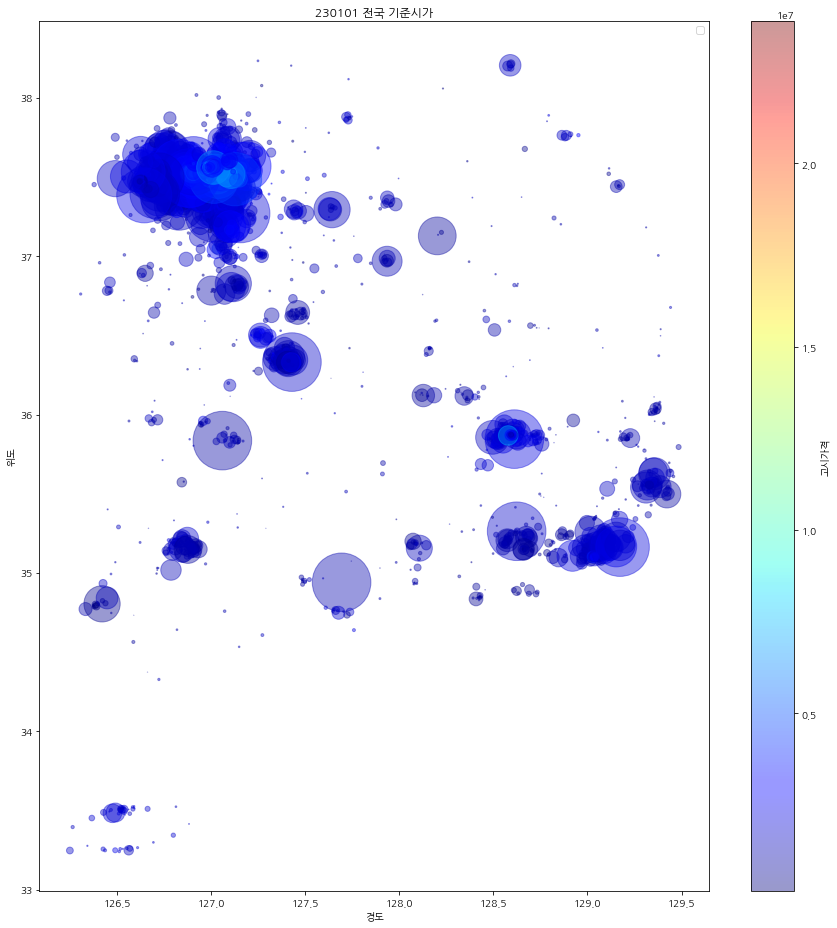

In [24]:
dongPlot.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(15,16), s=dongPlot['count_dong']*0.1, c="고시가격", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('230101 전국 기준시가')
plt.legend()
#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')

# 읍면동별로 나눌 때는 시도별로 우선 나누고 해야 할 듯

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


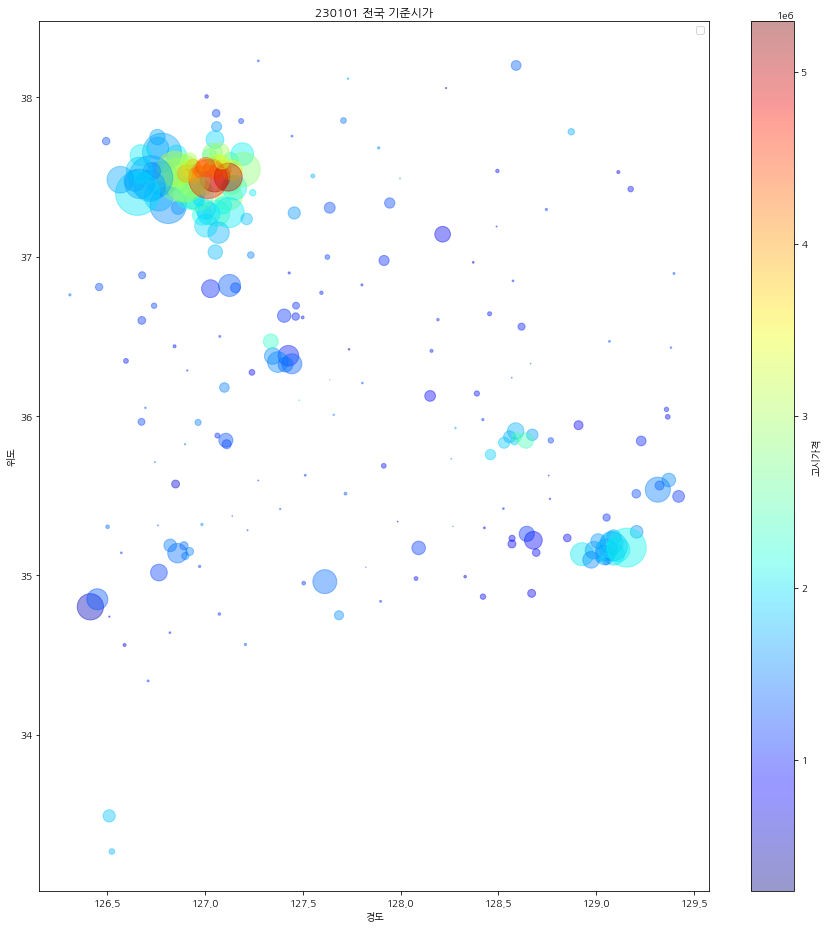

In [25]:
sggPlot.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(15,16), s=sggPlot['count_dong']*0.1, c="고시가격", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('230101 전국 기준시가')
plt.legend()
#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')

In [44]:
sidoPlot

,SIDO_NM,상가건물층주소,상가건물번호,시군구법정동코드,호,고시가격,전용면적,공유면적,전체면적,전용률(%),위도,경도,count_dong,count_gu,count_sido
0,강원도,5.897415,76630.422018,4.230228e+09,19.651376,1.258246e+06,48.688160,26.053718,74.741878,63.603782,37.636269,128.298143,540.394495,1510.513761,9189.0
1,경기도,4.570789,38579.969905,4.132375e+09,11.511154,1.988661e+06,133.743833,86.161477,219.905309,63.824697,37.424381,126.981646,5835.675260,27343.569204,764040.0
2,경상남도,5.595688,76495.894172,4.824480e+09,9.234663,9.002586e+05,49.965163,25.963276,75.928439,66.165451,35.168023,128.583778,903.638037,3220.852761,38043.0
3,경상북도,4.537451,76567.072941,4.723617e+09,17.555294,1.028322e+06,60.314171,19.692452,80.006623,75.265117,36.101929,128.896255,480.211765,1493.320000,12501.0
4,광주광역시,4.190417,39729.922614,2.916253e+09,9.860136,1.449298e+06,174.722649,96.005009,270.727659,67.339939,35.163080,126.865743,1801.636364,36830.362121,39408.0
5,대구광역시,4.520198,38572.957934,2.725264e+09,14.518666,1.901936e+06,178.441998,116.119213,294.561211,68.280411,35.858393,128.586784,1618.275899,29453.798097,53101.0
6,대전광역시,3.911491,30363.637664,3.017869e+09,4.203361,1.448848e+06,176.051584,106.937364,282.988949,61.609658,36.353551,127.377566,3520.094118,49276.502521,43920.0
7,부산광역시,5.308280,39292.388690,2.634855e+09,19.831042,1.782438e+06,79.909893,35.696683,115.606576,71.133890,35.164469,129.062795,4813.634055,26782.953318,202914.0
8,서울특별시,4.619750,36948.244661,1.146868e+09,25.993826,3.632021e+06,112.846755,74.463194,187.309948,63.469230,37.539302,126.971603,7356.254061,36924.399432,653102.0
9,세종특별자치시,3.802741,49173.056872,3.611012e+09,1.189573,2.304656e+06,117.323788,113.505816,230.829604,52.379135,36.469289,127.335876,2229.933649,20039.000000,20039.0


In [54]:
map_avg_gu

,index,SIDO_NM,상가건물층주소,상가건물번호,시군구법정동코드,호,고시가격,전용면적,공유면적,전체면적,전용률(%),위도,경도,count_dong,count_gu,count_sido
0,8,서울특별시,4.619750,36948.244661,1.146868e+09,25.993826,3.632021e+06,112.846755,74.463194,187.309948,63.469230,37.539302,126.971603,7356.254061,36924.399432,653102.0
1,9,세종특별자치시,3.802741,49173.056872,3.611012e+09,1.189573,2.304656e+06,117.323788,113.505816,230.829604,52.379135,36.469289,127.335876,2229.933649,20039.000000,20039.0
2,1,경기도,4.570789,38579.969905,4.132375e+09,11.511154,1.988661e+06,133.743833,86.161477,219.905309,63.824697,37.424381,126.981646,5835.675260,27343.569204,764040.0
3,5,대구광역시,4.520198,38572.957934,2.725264e+09,14.518666,1.901936e+06,178.441998,116.119213,294.561211,68.280411,35.858393,128.586784,1618.275899,29453.798097,53101.0
4,14,제주특별자치도,4.853214,76632.342857,5.011575e+09,7.392143,1.802427e+06,62.810878,25.061789,87.872667,70.834608,33.428627,126.512870,1181.011429,8938.000000,14070.0
5,7,부산광역시,5.308280,39292.388690,2.634855e+09,19.831042,1.782438e+06,79.909893,35.696683,115.606576,71.133890,35.164469,129.062795,4813.634055,26782.953318,202914.0
6,11,인천광역시,4.837350,37390.868832,2.820808e+09,20.454504,1.658125e+06,125.190305,69.220471,194.410776,69.179554,37.478445,126.682619,11562.842827,42838.071885,223925.0
7,4,광주광역시,4.190417,39729.922614,2.916253e+09,9.860136,1.449298e+06,174.722649,96.005009,270.727659,67.339939,35.163080,126.865743,1801.636364,36830.362121,39408.0
8,6,대전광역시,3.911491,30363.637664,3.017869e+09,4.203361,1.448848e+06,176.051584,106.937364,282.988949,61.609658,36.353551,127.377566,3520.094118,49276.502521,43920.0
9,10,울산광역시,5.042386,37311.806604,3.121692e+09,9.435535,1.371922e+06,119.435309,55.358530,174.793838,69.552891,35.541049,129.329744,2991.621069,40544.768868,24909.0


In [58]:
norm(sidoPlot['count_sido'])

masked_array(data=[0.00241055, 1.        , 0.04054317, 0.00678759,
                   0.04234711, 0.06044339, 0.04831004, 0.25843196,
                   0.85338752, 0.0167496 , 0.02318565, 0.28619949,
                   0.01359368, 0.        , 0.00886114, 0.02636403,
                   0.00424489],
             mask=False,
       fill_value=1e+20)

<ipython-input-128-ff7d34db1095>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm)


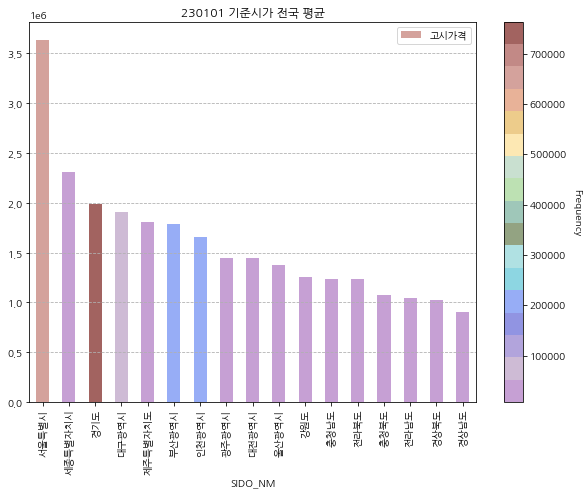

In [128]:
map_avg_gu = sidoPlot.sort_values('고시가격', ascending=False).reset_index()


min_freq = min(map_avg_gu['count_sido'])
max_freq = max(map_avg_gu['count_sido'])
norm = plt.Normalize(vmin=min_freq, vmax=max_freq)

#cmap = plt.get_cmap("rainbow")

# Define color codes for each range
color_codes = ['#C6A0D4', '#cebbd5', '#b2a4dc', '#9194E2', '#97ADF6', '#8DD6E2', '#B0E1E3', '#93a382', '#9FC7B9', '#BDE1B3', '#C9E0D0',
                '#FDE8B3', '#EDCC8B', '#E8B298', '#D4A29C', '#c28986', '#A26360']
                #, '#D4F0F0', '#8FCACA']

# Create a custom colormap
custom_cmap = ListedColormap(color_codes)

map_avg_gu.plot(kind="bar", x='SIDO_NM', y='고시가격', figsize=(10,7), color=custom_cmap(norm(map_avg_gu['count_sido'])))
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([]) 
colorbar = plt.colorbar(sm)
colorbar.ax.get_yaxis().labelpad = 15
colorbar.ax.set_ylabel('Frequency', rotation=270)
colorbar.set_alpha(0.4) 
plt.rc('font', family='NanumGothic')
plt.title('230101 기준시가 전국 평균')
plt.grid(True, axis='y', linestyle='--')
plt.legend()

In [31]:
sidoList

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


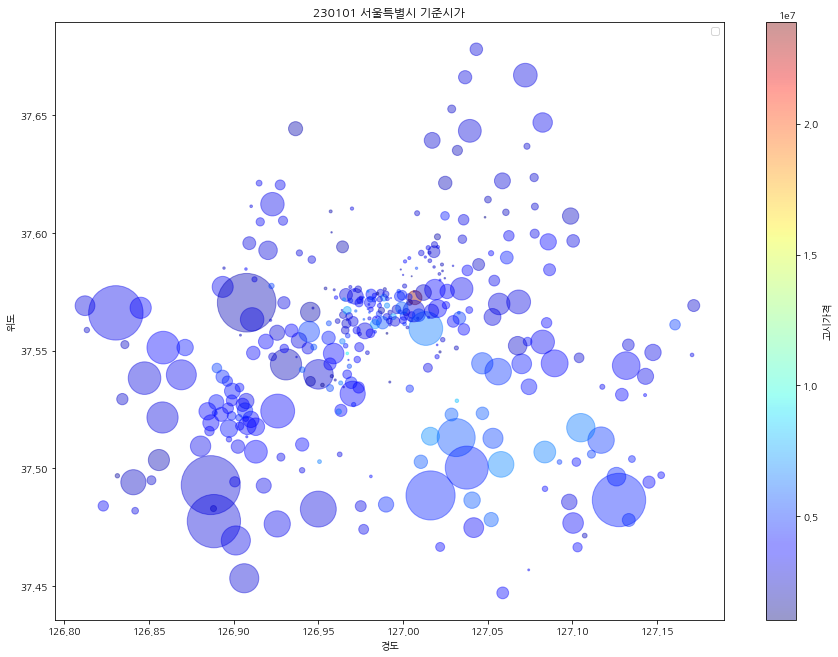

In [39]:
sidoList = dongPlot['SIDO_NM'].unique().tolist()
k=8
region = dongPlot[dongPlot['SIDO_NM']==sidoList[k]]
region.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(15,11), s=region['count_dong']*0.1, c="고시가격", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.rc('font', family='NanumGothic')
plt.title('230101 '+sidoList[k]+' 기준시가')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

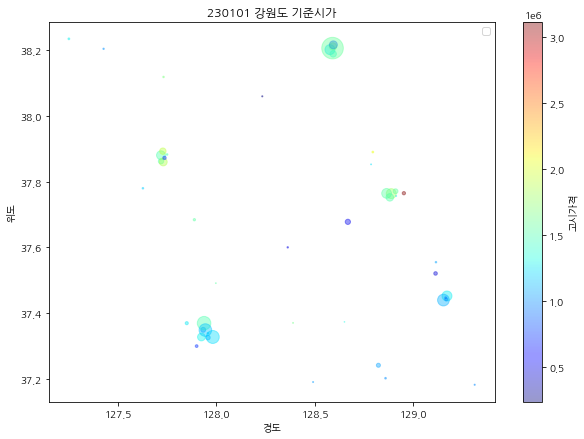

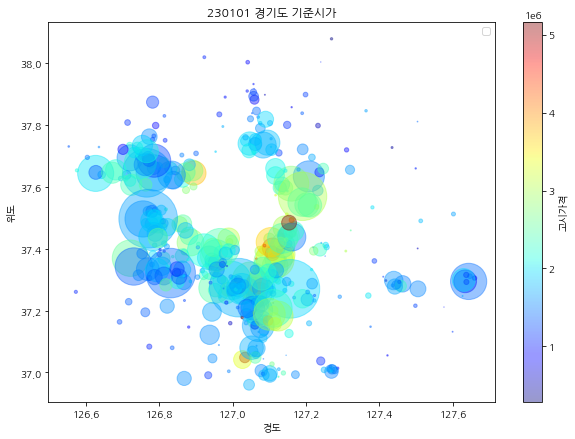

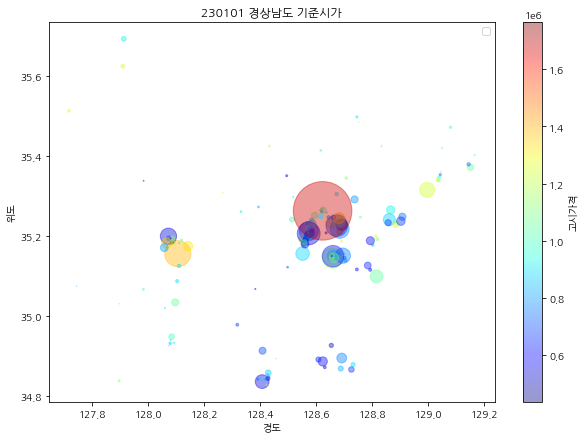

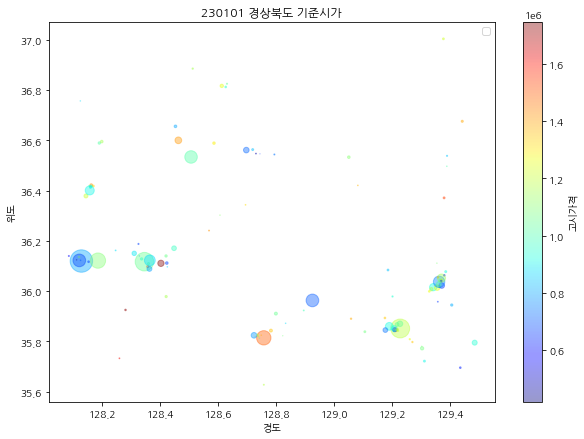

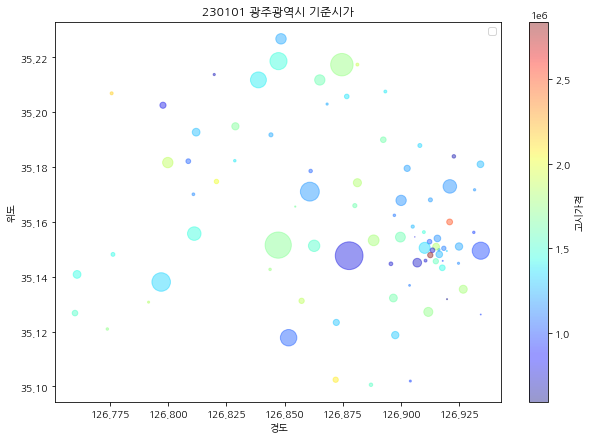

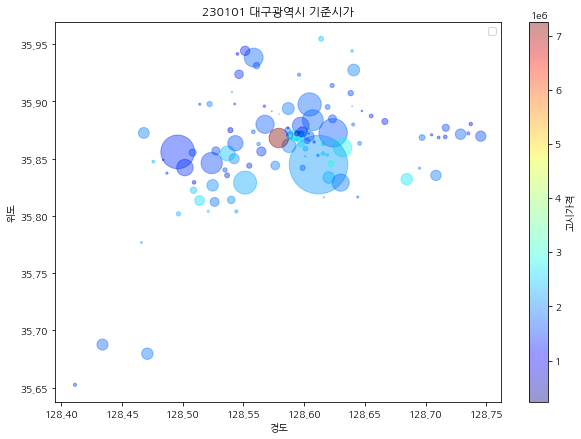

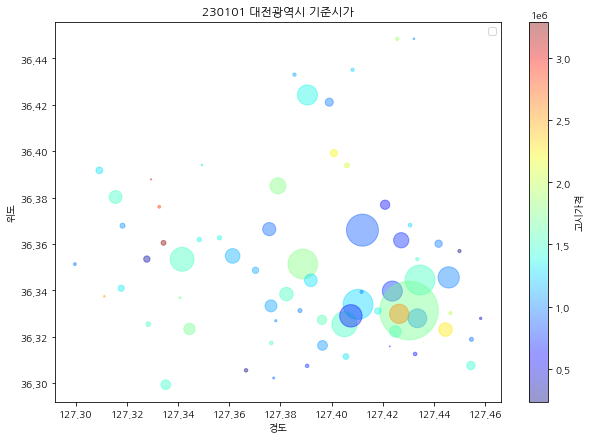

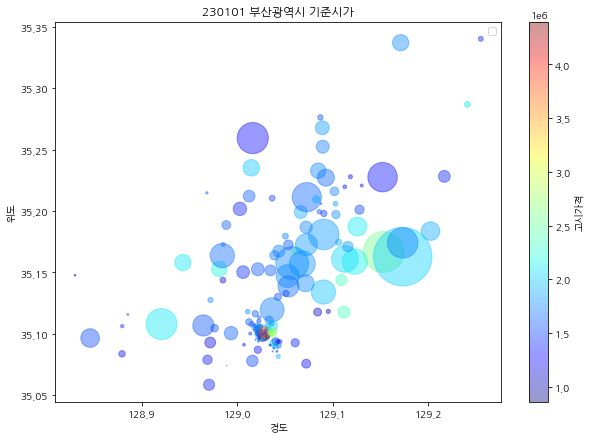

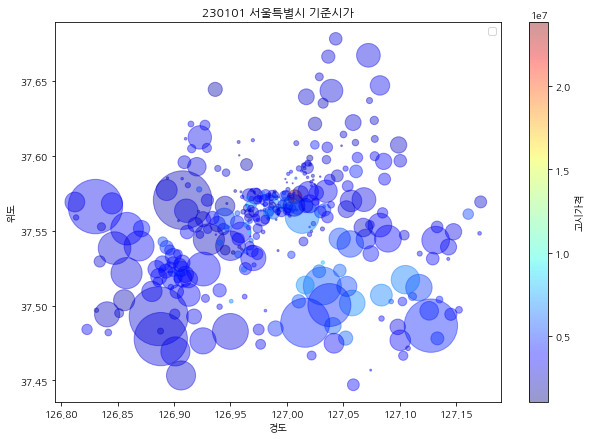

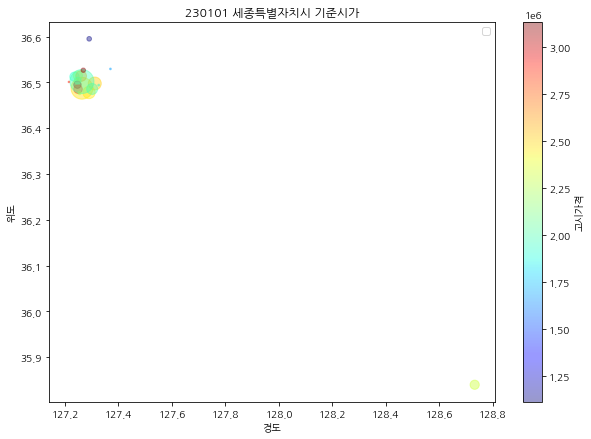

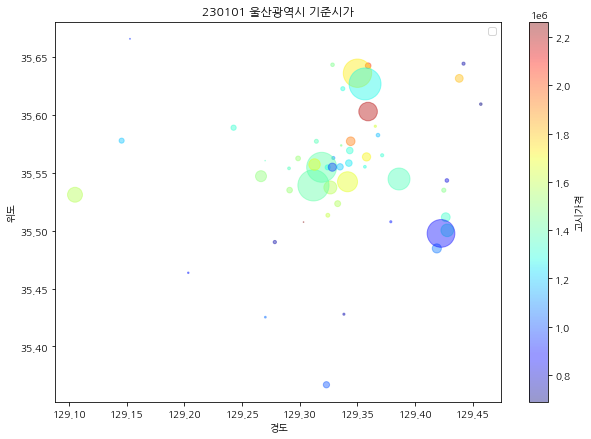

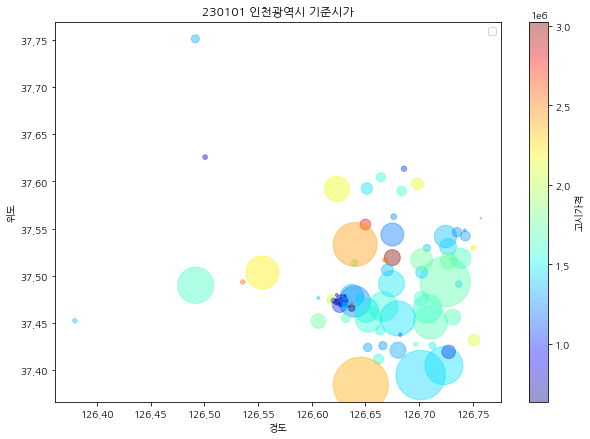

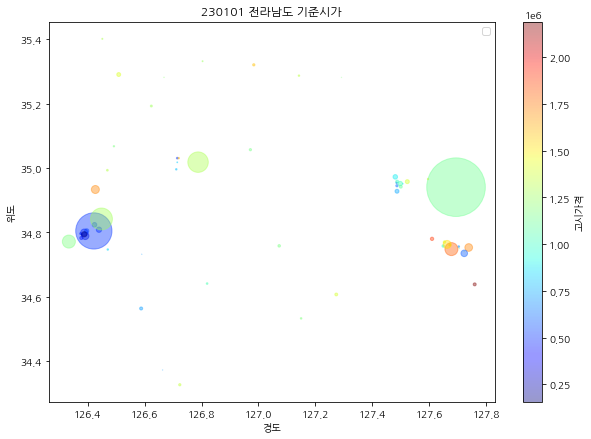

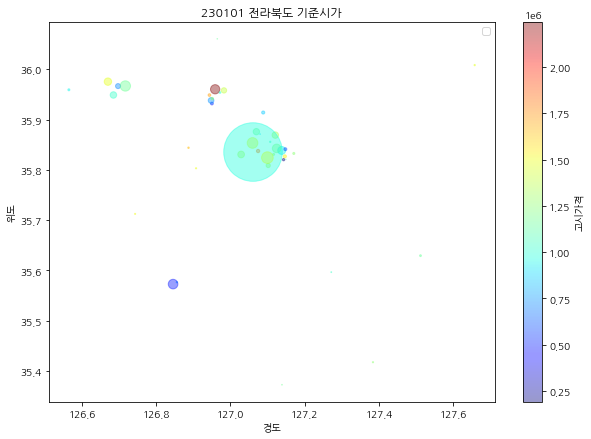

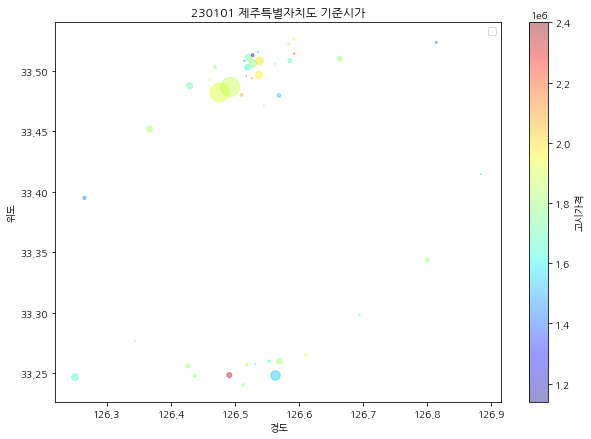

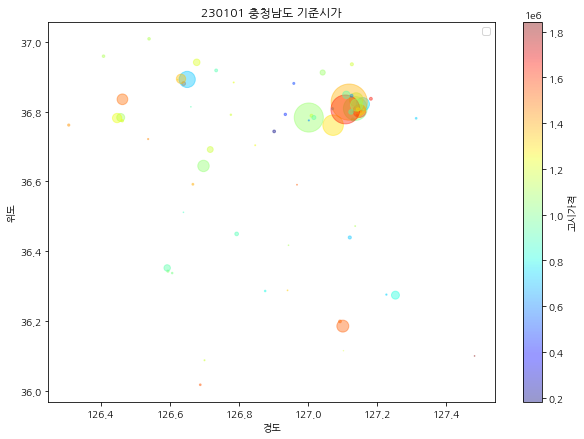

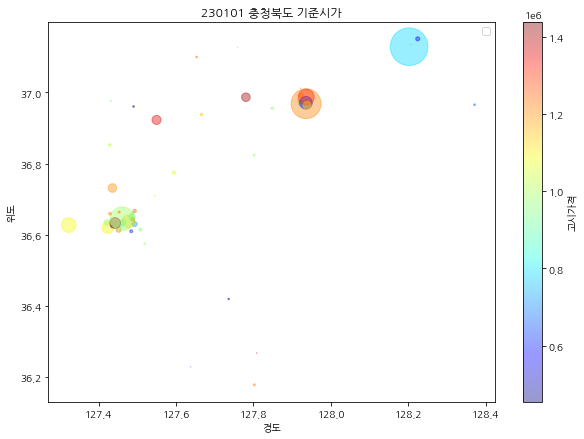

In [29]:
sidoList = dongPlot['SIDO_NM'].unique().tolist()
k=0
while k<len(sidoList):
    region = dongPlot[dongPlot['SIDO_NM']==sidoList[k]]
    region.plot(kind="scatter", x="경도", y="위도", alpha=0.4, figsize=(10,7), s=region['count_dong']*0.1, c="고시가격", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
    plt.rc('font', family='NanumGothic')
    plt.title('230101 '+sidoList[k]+' 기준시가')
    plt.legend()
    k=k+1

#plt.savefig('2018-2023 실거래가_강남3구·용산·성동 groupby 위도+경도_data_1.png')

In [7]:
df.groupby(['상가종류코드','시군구법정동코드', '상가건물블록주소']).mean().reset_index()

<ipython-input-7-9722af63eb13>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['상가종류코드','시군구법정동코드', '상가건물블록주소']).mean().reset_index()


,상가종류코드,시군구법정동코드,상가건물블록주소,상가건물번호,호,상가건물층주소,고시가격,전용면적,공유면적,전체면적,전용률(%)
0,상가,1111010700,광화문플래티넘,51.0,0.0,1.611111,2.419139e+06,89.417944,95.115778,184.533722,45.277778
1,상가,1111010700,생산성본부,24043.0,1.0,4.526316,1.954000e+06,581.147895,463.587368,1044.735263,56.052632
2,상가,1111010700,적선현대빌딩,50.0,0.0,4.905882,2.610371e+06,131.585176,58.050529,189.635706,70.923529
3,상가,1111011300,파크뷰타워,53.0,5.0,1.000000,1.666667e+06,144.746667,49.170000,193.916667,75.333333
4,상가,1111011400,세양빌딩,62163.0,0.0,4.980769,3.527135e+06,163.315962,140.171154,303.487115,54.096154
...,...,...,...,...,...,...,...,...,...,...,...
39791,오피스텔,5013032021,아정펠리즈,74642.0,1.0,4.500000,2.002500e+06,70.916389,12.183417,83.099806,84.916667
39792,오피스텔,5013032021,표선에이스피아,75370.0,0.0,4.000000,9.388600e+05,27.400000,11.016000,38.416000,71.000000
39793,오피스텔,5013032021,하르빌표선비동,78192.0,3.0,2.666667,1.569333e+06,83.580000,21.040000,104.620000,80.000000
39794,오피스텔,5013032021,하르빌표선에이동,77668.0,3.0,2.500000,1.654500e+06,81.620000,17.470000,99.090000,82.000000


In [5]:
df.groupby(['상가종류코드', '고시일자', '시군구법정동코드', '상가건물블록주소', '상가건물동주소', '건물층구분코드', '상가건물층주소']).mean().reset_index()

<ipython-input-5-270eab457a5d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['상가종류코드', '고시일자', '시군구법정동코드', '상가건물블록주소', '상가건물동주소', '건물층구분코드', '상가건물층주소']).mean().reset_index()


,상가종류코드,고시일자,시군구법정동코드,상가건물블록주소,상가건물동주소,건물층구분코드,상가건물층주소,상가건물번호,호,고시가격,전용면적,공유면적,전체면적,전용률(%)
0,상가,2023-01-01,1111010700,광화문플래티넘,1(단일),지상층,1,51.0,0.0,4.880000e+06,681.820000,492.482000,1174.302000,58.0
1,상가,2023-01-01,1111010700,광화문플래티넘,1(단일),지상층,2,51.0,0.0,2.704667e+06,122.894833,136.646167,259.541000,47.0
2,상가,2023-01-01,1111010700,광화문플래티넘,1(단일),지상층,3,51.0,0.0,2.421500e+06,120.130000,116.604375,236.734375,51.0
3,상가,2023-01-01,1111010700,광화문플래티넘,1(단일),지하층,1,51.0,0.0,2.219476e+06,39.943667,56.141619,96.085286,42.0
4,상가,2023-01-01,1111010700,생산성본부,생산성본부,지상층,1,24043.0,1.0,4.772000e+06,560.140000,208.470000,768.610000,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222190,오피스텔,2023-01-01,5013032021,해비치빌오피스텔,1(단일),지상층,3,75993.0,0.0,1.601333e+06,80.416667,18.806667,99.223333,81.0
222191,오피스텔,2023-01-01,5013032021,해비치빌오피스텔,1(단일),지상층,4,75993.0,0.0,1.618000e+06,80.416667,18.806667,99.223333,81.0
222192,오피스텔,2023-01-01,5013032021,해비치빌오피스텔,1(단일),지상층,5,75993.0,0.0,1.651667e+06,80.416667,18.806667,99.223333,81.0
222193,오피스텔,2023-01-01,5013032021,해비치빌오피스텔,1(단일),지상층,6,75993.0,0.0,1.668667e+06,80.416667,18.806667,99.223333,81.0


In [3]:
df['상가종류코드'].value_counts()
# 오피스텔은 일단 분리하기로.
# 전용면적+공유면적 vs. 전용면적/공유면적 비율
# 고시가격(=1제곱미터당 기준시가)

오피스텔    1154407
상가      1007661
Name: 상가종류코드, dtype: int64

In [20]:
commerce = df[df['상가종류코드']=='상가']
commerce
# 위치파악 -> 법정동코드 변환

,상가건물번호,상가종류코드,고시일자,시군구법정동코드,특수지코드,번지,호,상가건물블록주소,상가건물동주소,건물층구분코드,상가건물층주소,상가건물호주소,고시가격,전용면적,공유면적,전체면적,전용률(%)
0,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,1,5986000,639.470,357.740,997.210,64.0
1,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,2,6640000,198.410,111.000,309.410,64.0
2,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,3,6108000,281.500,157.480,438.980,64.0
3,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,1,2602000,235.350,106.010,341.360,69.0
4,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,10,2602000,231.330,104.200,335.530,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976635,44886,상가,2023-01-01,4183040024,일반지번,785,4,골든타워A동,A동,지상층,1,101,4452000,59.360,0.676,60.036,99.0
976679,56655,상가,2023-01-01,4183040024,일반지번,792,4,개성하이빌1동,1동,지상층,1,101호,3024000,69.930,12.350,82.280,85.0
976696,60566,상가,2023-01-01,4183040024,일반지번,325,24,밀레니엄,1(단일),지상층,1,101,2142000,45.450,18.800,64.250,71.0
976697,60566,상가,2023-01-01,4183040024,일반지번,325,24,밀레니엄,1(단일),지상층,1,102,1820000,66.150,27.363,93.513,71.0


In [21]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007661 entries, 0 to 976698
Data columns (total 17 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   상가건물번호    1007661 non-null  int64  
 1   상가종류코드    1007661 non-null  object 
 2   고시일자      1007661 non-null  object 
 3   시군구법정동코드  1007661 non-null  int64  
 4   특수지코드     1007661 non-null  object 
 5   번지        1007661 non-null  object 
 6   호         1007661 non-null  int64  
 7   상가건물블록주소  1007661 non-null  object 
 8   상가건물동주소   1007661 non-null  object 
 9   건물층구분코드   1007661 non-null  object 
 10  상가건물층주소   1007661 non-null  int64  
 11  상가건물호주소   1007650 non-null  object 
 12  고시가격      1007661 non-null  int64  
 13  전용면적      1007661 non-null  float64
 14  공유면적      1007661 non-null  float64
 15  전체면적      1007661 non-null  float64
 16  전용률(%)    1007661 non-null  float64
dtypes: float64(4), int64(5), object(8)
memory usage: 138.4+ MB


In [24]:
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구코드     2355 non-null   int64 
 1   법정동코드     2355 non-null   int64 
 2   행정동코드     2355 non-null   int64 
 3   시도명       2355 non-null   object
 4   시군구명      2354 non-null   object
 5   법정동명      2355 non-null   object
 6   행정동명      1243 non-null   object
 7   적용시작일     2355 non-null   int64 
 8   적용만료일     2355 non-null   int64 
 9   시군구법정동코드  2355 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 184.1+ KB


In [16]:
commerce.groupby('상가건물블록주소').mean().reset_index()

<ipython-input-16-203caaa59779>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commerce.groupby('상가건물블록주소').mean().reset_index()


,상가건물블록주소,상가건물번호,법정동코드,호,상가건물층주소,고시가격,전용면적,공유면적,전체면적,전용률(%)
0,(101-4),44053.000000,2.917010e+09,4.000000,1.000000,1.417500e+06,111.898500,30.565000,142.463500,79.000000
1,(1014-1),25421.000000,2.820010e+09,1.000000,3.818182,1.059364e+06,643.742727,170.839091,814.581818,79.000000
2,(1111-5),44705.000000,4.146312e+09,5.000000,1.000000,3.360000e+06,72.425000,26.130000,98.555000,73.000000
3,(1571-0),1967.000000,2.817710e+09,0.000000,1.000000,1.347400e+06,64.793000,37.835000,102.628000,62.200000
4,(169-10),22112.000000,1.126010e+09,10.000000,1.347826,2.582174e+06,58.976087,47.308261,106.284348,57.217391
...,...,...,...,...,...,...,...,...,...,...
17557,힘멜하임,36795.000000,1.156013e+09,3.000000,1.000000,3.304250e+06,29.722500,7.202500,36.925000,80.750000
17558,힘찬마디병원,61717.000000,4.122010e+09,0.000000,1.545455,3.043000e+06,273.324545,57.463727,330.788273,83.000000
17559,힘찬프라자,34835.702381,3.837551e+09,13.738095,2.839286,3.111857e+06,91.885774,57.056137,148.941911,66.291667
17560,힘찬프라자(원당지구),25488.000000,2.826011e+09,6.000000,2.434783,2.328652e+06,87.505217,67.313391,154.818609,55.826087


In [6]:
df['평당 기준시가'].describe()

count    2.162068e+06
mean     3.329745e+04
std      3.915245e+05
min      6.000000e+00
25%      7.960000e+03
50%      1.638000e+04
75%      3.100300e+04
max      4.406667e+08
Name: 평당 기준시가, dtype: float64

In [40]:
code_korea = pd.read_csv('/home/subin/다운로드/팩터 논문/Z_LURIS_LSCT_LAWDCD.csv', encoding='cp949')
code_korea.rename(columns={'LAWD_CD':'시군구법정동코드'}, inplace=True)
code_korea = code_korea[['시군구법정동코드', 'SIDO_NM', 'SGG_NM', 'UMD_NM']].drop_duplicates()
code_korea

,시군구법정동코드,SIDO_NM,SGG_NM,UMD_NM
0,4790043030,경상북도,예천군,은풍면
1,4275038000,강원도,영월군,무릉도원면
2,4812313400,경상남도,창원시 성산구,용지동
3,4122012800,경기도,평택시,고덕동
4,2671025927,부산광역시,기장군,일광읍
...,...,...,...,...
24027,4480025628,충청남도,홍성군,홍북읍
24028,4136037022,경기도,남양주시,퇴계원면
24029,4679041529,전라남도,화순군,사평면
24030,4729025626,경상북도,경산시,압량읍


In [36]:
code_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24032 entries, 0 to 24031
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LAWD_CD         24032 non-null  int64  
 1   SIDO_NM         24032 non-null  object 
 2   SGG_NM          24014 non-null  object 
 3   UMD_NM          23729 non-null  object 
 4   RI_NM           17877 non-null  object 
 5   CRE_DT          24031 non-null  float64
 6   DEL_DT          3487 non-null   float64
 7   OLD_LAWDCD      763 non-null    float64
 8   FRST_REGIST_DT  24032 non-null  int64  
 9   LAST_UPDT_DT    24032 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.8+ MB


In [44]:
commerce_address = pd.merge(commerce, code_korea, on='시군구법정동코드', how='left')
commerce_address

,상가건물번호,상가종류코드,고시일자,시군구법정동코드,특수지코드,번지,호,상가건물블록주소,상가건물동주소,건물층구분코드,상가건물층주소,상가건물호주소,고시가격,전용면적,공유면적,전체면적,전용률(%),SIDO_NM,SGG_NM,UMD_NM
0,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,1,5986000,639.470,357.740,997.210,64.0,서울특별시,종로구,적선동
1,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,2,6640000,198.410,111.000,309.410,64.0,서울특별시,종로구,적선동
2,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,1,3,6108000,281.500,157.480,438.980,64.0,서울특별시,종로구,적선동
3,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,1,2602000,235.350,106.010,341.360,69.0,서울특별시,종로구,적선동
4,50,상가,2023-01-01,1111010700,일반지번,80,0,적선현대빌딩,1(단일),지상층,10,10,2602000,231.330,104.200,335.530,69.0,서울특별시,종로구,적선동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007656,44886,상가,2023-01-01,4183040024,일반지번,785,4,골든타워A동,A동,지상층,1,101,4452000,59.360,0.676,60.036,99.0,경기도,양평군,용문면
1007657,56655,상가,2023-01-01,4183040024,일반지번,792,4,개성하이빌1동,1동,지상층,1,101호,3024000,69.930,12.350,82.280,85.0,경기도,양평군,용문면
1007658,60566,상가,2023-01-01,4183040024,일반지번,325,24,밀레니엄,1(단일),지상층,1,101,2142000,45.450,18.800,64.250,71.0,경기도,양평군,용문면
1007659,60566,상가,2023-01-01,4183040024,일반지번,325,24,밀레니엄,1(단일),지상층,1,102,1820000,66.150,27.363,93.513,71.0,경기도,양평군,용문면


In [45]:
commerce_address.isnull().sum()

상가건물번호       0
상가종류코드       0
고시일자         0
시군구법정동코드     0
특수지코드        0
번지           0
호            0
상가건물블록주소     0
상가건물동주소      0
건물층구분코드      0
상가건물층주소      0
상가건물호주소     11
고시가격         0
전용면적         0
공유면적         0
전체면적         0
전용률(%)       0
SIDO_NM      0
SGG_NM       0
UMD_NM       0
dtype: int64